In [1]:
import sys
sys.path.insert(0, '/data/schoiaj/repos/nli_explain')

import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

import torch

from explainers.integrated_hessians.path_explain.plot.text import matrix_interaction_plot
from explainers.integrated_hessians.IH_explainer import IHBertExplainer

%load_ext autoreload
%autoreload 2

device = torch.device('cuda')

## Interaction

In [2]:
p,h,l = 'A man inspects the uniform of a figure in some East Asian country.', 'The man is sleeping', 'contradiction'

explainer = IHBertExplainer('bert-base', device=device)

interactions, batch_sentences, pred_label = explainer.explain(p, h, l)

0 correct


In [3]:
sep_index = batch_sentences.index(explainer.tokenizer.sep_token)

cropped_interaction = interactions[0][:sep_index, sep_index+1:]

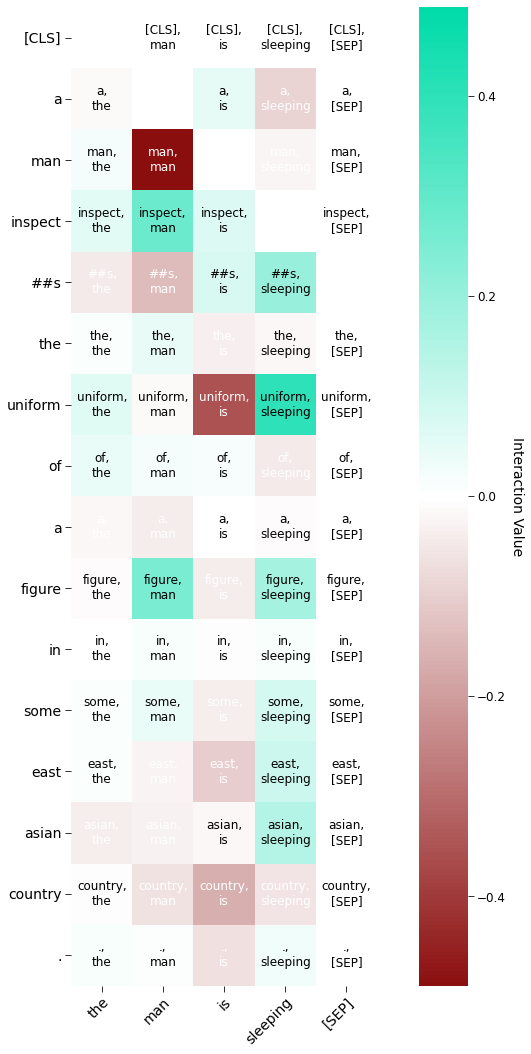

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 18))
axis = plt.gca()

matrix_interaction_plot(cropped_interaction, batch_sentences[sep_index+1:], batch_sentences[:sep_index], axis=axis);

## Attribution

In [ ]:
### Doing so will depend on how you tokenized your model!
attributions = explainer.attributions(inputs=batch_embedding,
                                      baseline=baseline_embedding,
                                      batch_size=32,
                                      num_samples=256,
                                      use_expectation=False,
                                      output_indices=pred_label)

text_plot(batch_sentences,
          attributions[0],
          include_legend=True)